## Imports

In [1]:
import sys
import os
from pathlib import Path

# Caminho base do projeto a partir do diretório de trabalho atual
base_dir = Path(os.getcwd()).resolve().parent  # Ajuste se necessário

# Adicionar a pasta 'visualization' ao sys.path de forma relativa
visualization_dir = base_dir / 'src' / 'visualization'
sys.path.append(str(visualization_dir))

# Importar o módulo Visualization
try:
    import Visualization
except ImportError:
    print("Erro: Não foi possível importar o módulo 'Visualization'. Verifique se o caminho está correto.")

## Contagem das imagens de cada classe

### 1.Desequilibrio das Classes

In [2]:
image_dir = base_dir / 'data' / 'raw'

pastas_para_analisar = [
    image_dir / 'Calculus',
    image_dir / 'Tooth Discoloration' / 'Tooth_Discoloration',
    image_dir / 'Mouth Ulcer' / 'Mouth_Ulcer',
    image_dir / 'Hypodontia',
    image_dir / 'Gingivitis',
    image_dir / 'Caries' / 'Caries',
]

In [3]:
contagem_de_imagens = Visualization.contar_imagens_em_pastas(pastas_para_analisar)
contagem_de_imagens

{'Calculus': 1296,
 'Tooth_Discoloration': 183,
 'Mouth_Ulcer': 265,
 'Hypodontia': 1251,
 'Gingivitis': 2349,
 'Caries': 219}

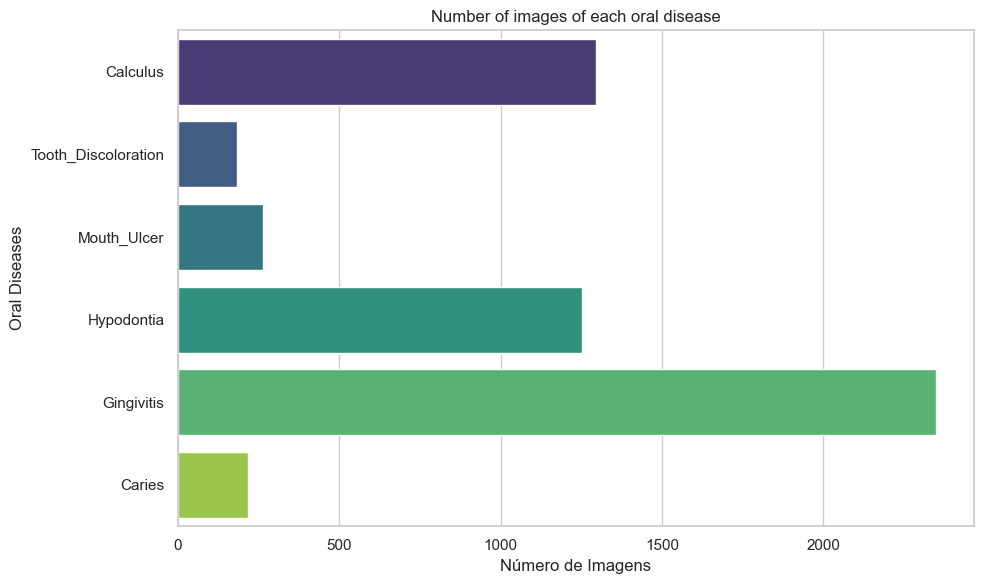

In [4]:
Visualization.criar_barplot(contagem_de_imagens)

Existe um elevado desequilibrio entre as classes, o que irá prejudicar, de forma considerável, o modelo.
Para tal, serão realizados várias abordagens para tentar combater este problema; abaixo é possivel visualizar uma das soluções, sendo essa a *Data Augmentation* que consiste em aplicar transformações (como rotação, Translação, Zoom, reflexão, etc...) às imagens da classe minoritária para criar novas instâncias e assim balancear as classes.

### 2. Solução para o desequilibrio das classes

In [5]:
pastas_para_analisar = [
    image_dir / 'Calculus',
    image_dir / 'Tooth Discoloration' / 'Tooth_Discoloration_Augmented_DataSet',
    image_dir / 'Mouth Ulcer' / 'Mouth_Ulcer_Augmented_DataSet',
    image_dir / 'Hypodontia',
    image_dir / 'Gingivitis',
    image_dir / 'Caries' / 'Caries_Augmented_DataSet',
]

In [6]:
contagem_de_imagens = Visualization.contar_imagens_em_pastas(pastas_para_analisar)
contagem_de_imagens

{'Calculus': 1296,
 'Tooth_Discoloration_Augmented_DataSet': 1834,
 'Mouth_Ulcer_Augmented_DataSet': 2541,
 'Hypodontia': 1251,
 'Gingivitis': 2349,
 'Caries_Augmented_DataSet': 2382}

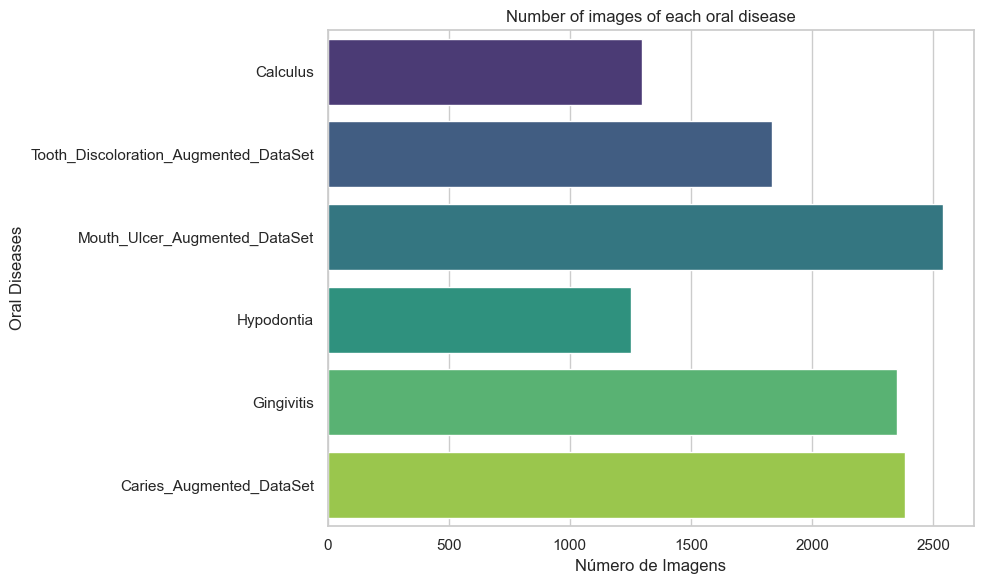

In [7]:
Visualization.criar_barplot(contagem_de_imagens)

Acima, é notório que agora as classes encontram-se mais equilibradas